In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [2]:
X, Y = load_planar_dataset()

In [3]:
print("Train data Details :\n***********************************")
print("Shape of X : %s"%str(X.shape))
print("Shape of Y : %s"%str(Y.shape))

Train data Details :
***********************************
Shape of X : (2, 400)
Shape of Y : (1, 400)


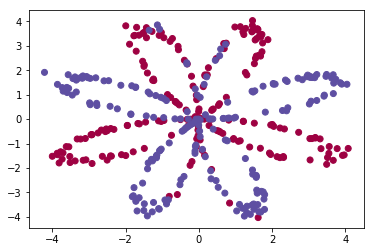

In [7]:
plt.scatter(X[0,:],X[1,:],c=Y[0],cmap=plt.cm.Spectral)

In [8]:
#Linear Model
clf = sklearn.linear_model.LogisticRegression().fit(X.T,Y.T)

C:\Users\ANKIT PODDER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ANKIT PODDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
print("Intercept is %s"%str(clf.intercept_))
print("Coef : %s"%str(clf.coef_))

Intercept is [0.01534954]
Coef : [[ 0.02799814 -0.20262419]]


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


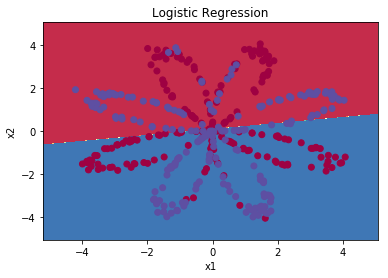

In [14]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + 
       np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +'% ' + "(percentage of correctly labelled datapoints)")

In [15]:
def sigmoid(X):
    return (1 / (1 + np.exp(-1 * X)))

In [19]:
def relu(X):
    return np.where(X>=0 , X , 0)

In [20]:
def leaky_relu(X):
    return np.where(X>=0 , X , 0.01 * X)

In [26]:
def figure(func,label=None):
    y = func(np.linspace(-10,10))
    plt.figure(figsize=(10,6))
    plt.plot(np.linspace(-10,10),y,label=label)
    if label:
        plt.legend()
    plt.xlabel("z")
    plt.ylabel("g(z)")
    plt.grid("True")

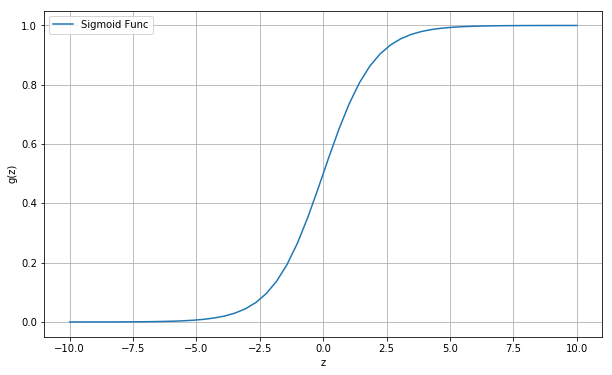

In [27]:
figure(sigmoid,"Sigmoid Func")

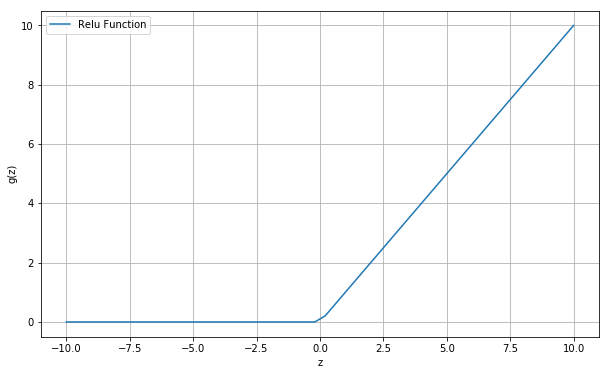

In [28]:
figure(relu,"Relu Function")

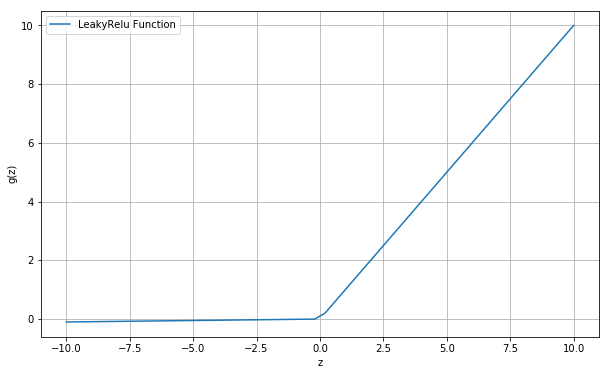

In [29]:
figure(leaky_relu,"LeakyRelu Function")

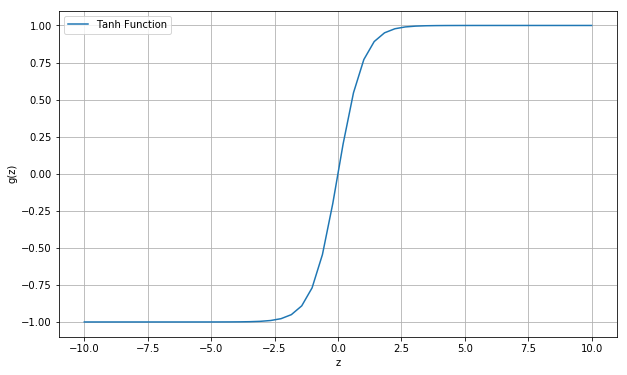

In [30]:
figure(np.tanh,"Tanh Function")

In [115]:
def initialise_parameter(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x) * 0.1
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.1
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [116]:
def forward_propagation(X,Y,parameters):
    m  = X.shape[1]
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    logprobs = np.multiply(np.log(A2),Y)
    cost = - np.sum(logprobs)
    cost = float(np.squeeze(cost))
    
    cache = {
        'Z1' : Z1,
        'A1' : A1,
        'Z2' : Z2,
        'A2' : A2,
        'cost' : cost
    }
    
    return cache

In [117]:
def backward_propagation(X,Y,parameters,learning_rate):
    cache = forward_propagation(X,Y,parameters)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache['A1']
    A2 = cache['A2']
    cost = cache['cost']
    
    m = X.shape[1]
    
    dZ2 = A2-Y
    dW2 = (1 / m) * np.dot(dZ2,A1.T)
    db2 = (1 / m) * np.sum(dZ2,axis = 1,keepdims = True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - A1**2)
    dW1 = (1 / m) * np.dot(dZ1,X.T)
    db1 = (1 / m) * np.sum(dZ1,axis = 1,keepdims = True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    p = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return p,cost

In [118]:
def initialize_dims(X,Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return n_x,n_h,n_y

In [123]:
def accurecy(X,Y,parameters):
    cache = forward_propagation(X,Y,parameters)
    A2 = cache['A2']
    return (np.where(A2<=0.5 , 0 , 1) == Y).mean()

In [130]:
def nn_model(X,Y,alpha=0.005,iteration=0.05,print_details=False,step=1000):
    model_details = {}
    n_x,n_h,n_y = initialize_dims(X,Y)
    model_details['n_x'] = n_x
    model_details['n_h'] = n_h
    model_details['n_y'] = n_y
    model_details['alpha'] = alpha
    model_details['iteration'] = iteration
    
    parameters = initialise_parameter(n_x,n_h,n_y)
    Cost = []
    acc = []
    
    for it in range(iteration+1):
        parameters,cost = backward_propagation(X,Y,parameters,alpha)
        Cost.append(cost)
        acc.append(accurecy(X,Y,parameters))
        if print_details and it%1000==0:
            print("Loss on %dth epoch is : %.5f"%(it,cost))
    
    model_details['parameters'] = parameters
    model_details['cost'] = Cost
    model_details['acc']  = acc
    
    return model_details

In [131]:
details = nn_model(X,Y,iteration=15000,alpha=1.2,print_details=True)

Loss on 0th epoch is : 137.34346
Loss on 1000th epoch is : 56.88011
Loss on 2000th epoch is : 48.26903
Loss on 3000th epoch is : 46.18699
Loss on 4000th epoch is : 45.07553
Loss on 5000th epoch is : 44.31508
Loss on 6000th epoch is : 43.74634
Loss on 7000th epoch is : 43.30397
Loss on 8000th epoch is : 47.80675
Loss on 9000th epoch is : 47.76106
Loss on 10000th epoch is : 47.69770
Loss on 11000th epoch is : 47.62634
Loss on 12000th epoch is : 47.55218
Loss on 13000th epoch is : 47.47758
Loss on 14000th epoch is : 47.40384
Loss on 15000th epoch is : 47.33169


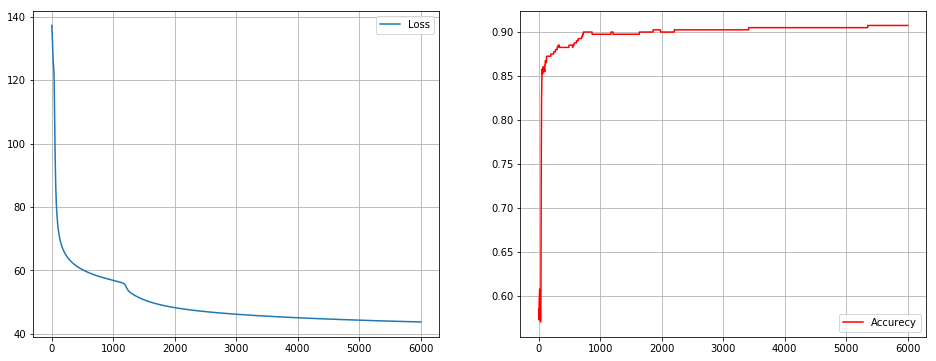

In [148]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.plot(details["cost"][:6000],label="Loss")
ax1.legend()
ax2.plot(details["acc"][:6000],'r',label="Accurecy")
ax2.legend()
ax1.grid(True)
ax2.grid(True)

In [150]:
def predict(X,Y,parameters):
    cache = forward_propagation(X,Y,parameters)
    A2 = cache['A2']
    return np.where(A2<=0.5 , 0 , 1)

In [151]:
plot_decision_boundary(lambda x: predict(x.T,details['parameters']), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

TypeError: predict() missing 1 required positional argument: 'parameters'